<a href="https://colab.research.google.com/github/KrittikaDas/Insurance-Fraud-Detection/blob/main/insurance_fraud_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install xgboost shap ydata-profiling


  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [3]:
import pandas as pd
from ydata_profiling import ProfileReport

In [4]:
from google.colab import files
uploaded = files.upload()


Saving insurance_data.csv to insurance_data (1).csv


In [5]:
df = pd.read_csv("insurance_data.csv")
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
print(df.shape)
df.info()
df.describe()

(1000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [9]:
df.drop(columns=["policy_number", "_c39"], inplace=True)


In [10]:
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})


In [11]:
import numpy as np
df.replace('?', np.nan, inplace=True)


In [12]:
df.isnull().sum()


,0
months_as_customer,0
age,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0
insured_sex,0


In [13]:
df['collision_type'].fillna('Unknown', inplace=True)
df['property_damage'].fillna('Unknown', inplace=True)
df['police_report_available'].fillna('Unknown', inplace=True)
df['authorities_contacted'].fillna('Unknown', inplace=True)



<ipython-input-13-0c4f504442a9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['collision_type'].fillna('Unknown', inplace=True)
<ipython-input-13-0c4f504442a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [14]:
df.isnull().sum().sum()


0

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

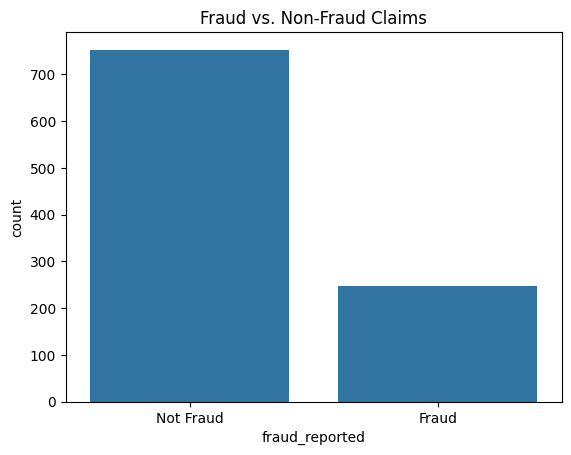

In [16]:
sns.countplot(x='fraud_reported', data=df)
plt.title("Fraud vs. Non-Fraud Claims")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

In [17]:
fraud_counts = df['fraud_reported'].value_counts(normalize=True) * 100
print(fraud_counts)

fraud_reported
0    75.3
1    24.7
Name: proportion, dtype: float64


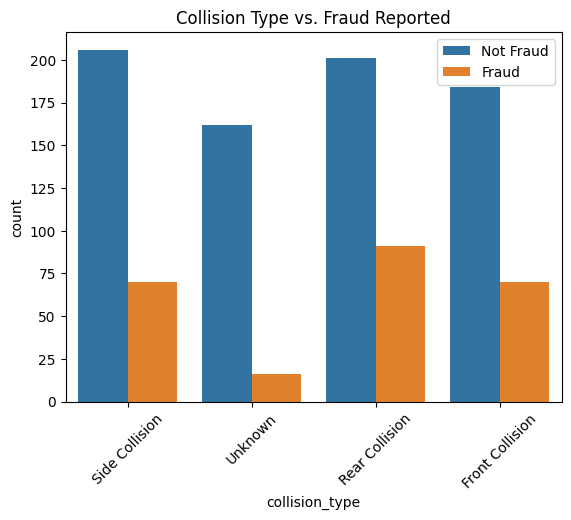

In [18]:
sns.countplot(x='collision_type', hue='fraud_reported', data=df)
plt.title("Collision Type vs. Fraud Reported")
plt.xticks(rotation=45)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()


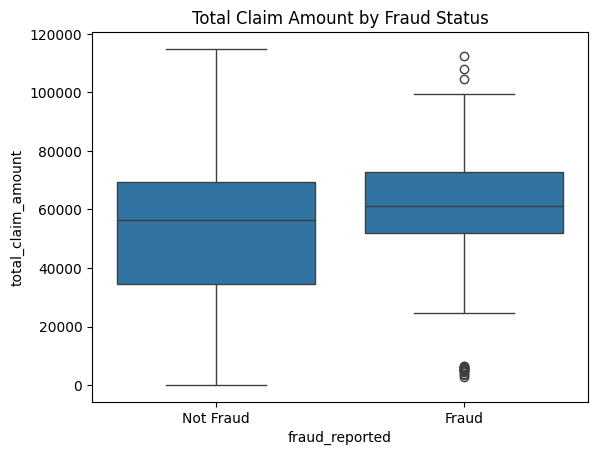

In [19]:
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title("Total Claim Amount by Fraud Status")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()


In [20]:
df.drop(columns=['incident_location'], inplace=True)

In [21]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [22]:
df_encoded.shape

(1000, 1155)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [24]:
X = df_encoded.drop(columns=['fraud_reported'])  # Features
y = df_encoded['fraud_reported']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
print("Training data shape after SMOTE:", X_train_resampled.shape, y_train_resampled.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape after SMOTE: (1216, 1154) (1216,)
Testing data shape: (200, 1154) (200,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [29]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42)  # Good for smaller datasets
rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [30]:
logistic_model.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)
xgb_model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:44:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [31]:
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

In [32]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print(classification_report(y_true, y_pred))  # Precision, Recall, F1-score
    print(confusion_matrix(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))

In [33]:
evaluate_model("Logistic Regression", y_test, logistic_predictions)
evaluate_model("Random Forest", y_test, rf_predictions)
evaluate_model("XGBoost", y_test, xgb_predictions)

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       145
           1       0.56      0.42      0.48        55

    accuracy                           0.75       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.73      0.75      0.74       200

[[127  18]
 [ 32  23]]
ROC AUC Score: 0.6470219435736676
--- Random Forest ---
              precision    recall  f1-score   support

           0       0.72      0.97      0.83       145
           1       0.00      0.00      0.00        55

    accuracy                           0.70       200
   macro avg       0.36      0.49      0.41       200
weighted avg       0.52      0.70      0.60       200

[[141   4]
 [ 55   0]]
ROC AUC Score: 0.4862068965517241
--- XGBoost ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.64      0.51      0.57        55

  

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
param_grid = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 10, 100],
    'min_child_weight': [1, 3, 5]
}

In [36]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [37]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='roc_auc',  # Optimize for ROC AUC
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)


In [38]:
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:08:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 10, 100],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [39]:
print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best ROC AUC Score: 0.9673013529118691


In [40]:
best_xgb_model = random_search.best_estimator_
y_pred_test = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print("Test Set ROC AUC Score:", roc_auc_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       145
           1       0.67      0.62      0.64        55

    accuracy                           0.81       200
   macro avg       0.76      0.75      0.76       200
weighted avg       0.81      0.81      0.81       200

[[128  17]
 [ 21  34]]
Test Set ROC AUC Score: 0.7504702194357367


In [41]:
feature_importance = best_xgb_model.feature_importances_

In [42]:
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importance})

In [43]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [44]:
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

Top 20 Most Important Features:
                             Feature  Importance
1079          collision_type_Unknown    0.031962
995            insured_hobbies_chess    0.025654
1025        incident_date_2015-01-12    0.019420
996        insured_hobbies_cross-fit    0.018807
1081    incident_severity_Total Loss    0.017965
1080  incident_severity_Minor Damage    0.017565
933      policy_bind_date_2014-04-25    0.013603
400      policy_bind_date_1999-10-05    0.013507
642      policy_bind_date_2006-04-13    0.012660
1131               auto_model_Fusion    0.012572
362      policy_bind_date_1998-10-12    0.012157
265      policy_bind_date_1996-01-16    0.012153
354      policy_bind_date_1998-03-21    0.011291
371      policy_bind_date_1998-12-28    0.010909
316      policy_bind_date_1997-05-01    0.010548
196      policy_bind_date_1994-04-01    0.010224
1089               incident_state_PA    0.009768
1050        incident_date_2015-02-06    0.009309
953      policy_bind_date_2014-09-02 

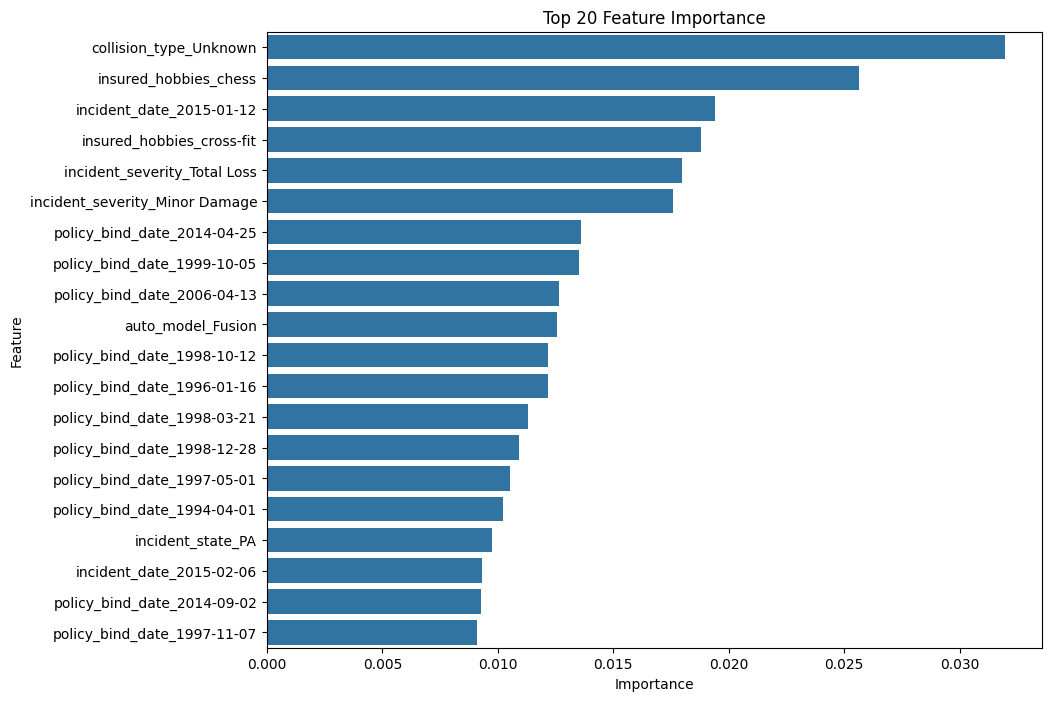

In [45]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importance')
plt.show()

In [46]:
top_20_features = feature_importance_df['Feature'].head(20).tolist()

In [47]:
X_train_selected = X_train_resampled[top_20_features]
X_test_selected = X_test[top_20_features]

In [48]:
best_xgb_selected = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    **random_search.best_params_  # Use the best hyperparameters found earlier
)

In [49]:
best_xgb_selected.fit(X_train_selected, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [50]:
y_pred_selected = best_xgb_selected.predict(X_test_selected)

In [51]:
print("\n--- Performance with Top 20 Features ---")
print(classification_report(y_test, y_pred_selected))
print(confusion_matrix(y_test, y_pred_selected))
print("Test Set ROC AUC Score:", roc_auc_score(y_test, y_pred_selected))


--- Performance with Top 20 Features ---
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       145
           1       0.65      0.87      0.74        55

    accuracy                           0.83       200
   macro avg       0.80      0.85      0.81       200
weighted avg       0.86      0.83      0.84       200

[[119  26]
 [  7  48]]
Test Set ROC AUC Score: 0.8467084639498431


Business Recommendation Overview
1. Overview:
This report is about a machine learning model used to identify insurance fraud. The claims data analysis outlined important predictors of fraud detection, and rather than just using a prediction model, the Fraud "XGBoost" model, trained on the top 20 variables, improved fraud detection significantly and should be executed to minimize the company's losses.


2. Problem Statement:
Insurance fraud causes large losses and impacts company profitability, as well increases premiums for the honest customer. It is essential to protect the company by accurately identifying the fraudulent claims to minimize losses.


3. Methodology
Claims data was cleaned, preprocessed, and analyzed using exploratory data analysis and machine learning. Subsequently, multiple classification models were constructed and evaluated, and the "XGBoost" model with tuned hyperparameters was identified and used based on performance. Finally, through feature importance analysis, it was possible to determine the most predictive features or components of fraud, and using feature selection allowed for the effectiveness of the model, beyond feature importance analysis.


4. Key Findings:
-XGBoost, trained using the top 20 features, performed very well, achieving a test set ROC AUC of 0.847. This does indicate strong discrimination between fraudulent and non-fraudulent claims respectively.

-It also has a very high recall (0.87) for the fraud class and therefore will minimize falsely missed fraud cases.

-There are several predictors of fraud:
>"Unknown" collision type (collision_type_Unknown)
>Some insured hobbies (insured_hobbies_chess, insured_hobbies_cross-fit)
>Some policy bind date (policy_bind_date)
>Some incident severity (incident_severity_Total Loss,
incident_severity_Minor Damage)


5. Suggestions:
-Automate the fraud detection developed through the XGBoost model used. XGboost is put into the claims processing system which would automatically accommodate claims records identified as high risk with recommendation for individual investigation.

-Investigate "unknown" collision type first, which is the highest predictor of fraudulent activity.

-You should look into the high risk of claims which resulted in a "high risk" hobby such as chess or cross fit reasoned-out for that decision and what ultimately may be prevention or deterence by specific understanding.

-Examine the claims enteries in regrard to the policy bind date and incident date in order to consider any potential trends with a view towards fraud.

-Modify the model prediction threshold in relation to the company's risk appetite and the relative costs of false positive and negative predictions.


6. Next Steps:
-Model monitoring & retraining: Regularly monitor the model performance and, time permitting, retrain it with new data to keep it current.

-Further Data Enrichment: Assess the incorporation of additional data sources to enhance the fraud detection process.

-Automation of investigation workflows: Prepare an automated investigation workflow for investigating flagged claims.

-Cost-benefit analysis: Perform a formal cost-benefit analysis to demonstrate the actual financial impact of using the fraud detection system.
